## Install required libraries

In [ ]:
!pip install matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

## Import required libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

## Change settings

In [3]:
# Change default font size
plt.rcParams['font.size'] = 14

# Change default graph size
plt.rcParams['figure.figsize'] = (6, 6)

# Square indicate ON
plt.rcParams['axes.grid'] = True

# Set precision of floating-point numbers in numpy
np.set_printoptions(suppress=True, precision=4)

## Prepare for the dataset

In [4]:
from sklearn.datasets import load_iris

# Load the data
iris = load_iris()

# Get input and correct data
x_org = iris.data
y_org = iris.target

## Splitting training data and validation data

In [6]:
# Shuffle also implemented
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    x_org, y_org, train_size=75, test_size=75,
    random_state=123)

## Define the class of the prediction model

In [8]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        # Initialize weight and bias values to 1.0
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    # Difine the prediction function
    def forward(self, x):
        x1 = self.l1(x) # Calculate linear function
        return x1

## Prepare the inputs and labels

In [9]:
# Dimension of input
n_input = x_train.shape[1]

# Dimension of output
n_output = len(list(set(y_train)))

In [10]:
# Learning rate
lr = 0.01

# Create predict function
net = Net(n_input, n_output)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function
optimizer = optim.SGD(net.parameters(), lr=lr)

# Repetition counts
num_epochs = 10000

# Record evaluation results
history = np.zeros((0,5))

# Tensor Variabilization
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long() # long: for NLLLoss function
inputs_valid = torch.tensor(x_valid).float()
labels_valid = torch.tensor(y_valid).long() # long: for NLLLoss function

## Execute multinomial classification

In [ ]:
for epoch in range(num_epochs):
    # Training phase

    # Initialize gradient
    optimizer.zero_grad()

    # 1. Calculate prediction
    outputs = net(inputs)

    # 2. Calculate loss
    loss = criterion(outputs, labels)

    # 3. Calculate gradient
    loss.backward()

    # 4. Adjust parameters
    optimizer.step()

    # Calculate the prediction label
    predicted = torch.max(outputs, 1)[1]

    # Calculate loss
    train_loss = loss.item()

    # Calculate accuracy
    train_acc = (predicted == labels).sum()  / len(labels)


    # Prediction phase

    # 1. Calculate prediction
    outputs_valid = net(inputs_valid)

    # 2. Calculate loss
    loss_valid = criterion(outputs_valid, labels_valid)

    # Calculate the prediction label
    predicted_valid = torch.max(outputs_valid, 1)[1]

    # Calculate loss
    val_loss =  loss_valid.item()

    # Calculate accuracy
    val_acc =  (predicted_valid == labels_valid).sum() / len(labels_valid)

    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch , train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

## Confirm the loss values and accuracies

In [12]:
print(f'Initial: Loss: {history[0,3]:.5f} Accuracy: {history[0,4]:.5f}' )
print(f'Final: Loss: {history[-1,3]:.5f} Accuracy: {history[-1,4]:.5f}' )

Initial: Loss: 1.09158 Accuracy: 0.26667
Final: Loss: 0.13724 Accuracy: 0.96000


## Display the learning curve for the loss

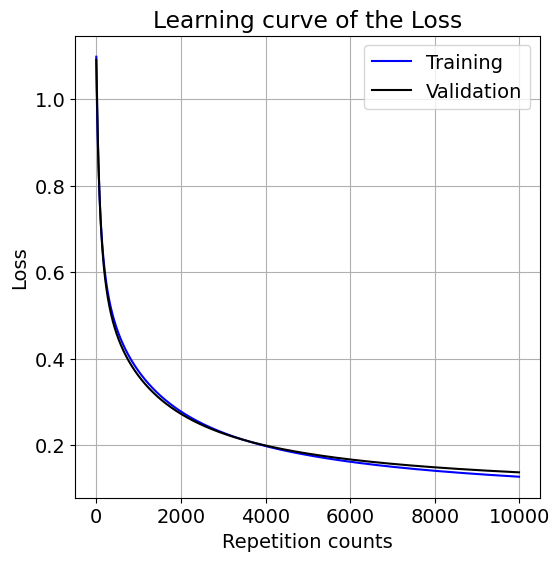

In [13]:
plt.plot(history[:,0], history[:,1], 'b', label='Training')
plt.plot(history[:,0], history[:,3], 'k', label='Validation')
plt.xlabel('Repetition counts')
plt.ylabel('Loss')
plt.title('Learning curve of the Loss')
plt.legend()
plt.show()

## Display learning curve for the accuracy

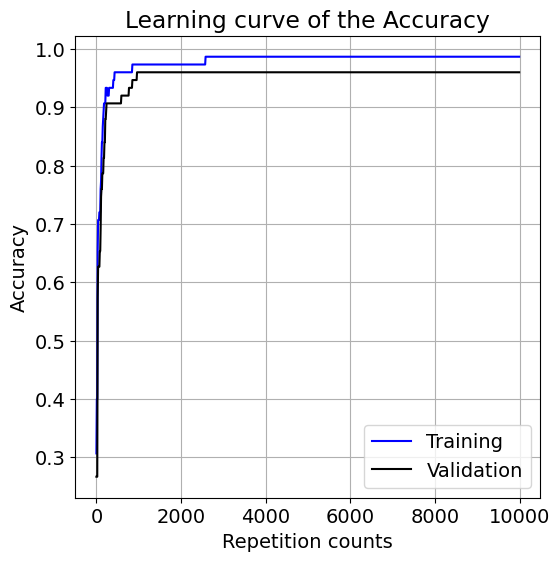

In [14]:
plt.plot(history[:,0], history[:,2], 'b', label='Training')
plt.plot(history[:,0], history[:,4], 'k', label='Validation')
plt.xlabel('Repetition counts')
plt.ylabel('Accuracy')
plt.title('Learning curve of the Accuracy')
plt.legend()
plt.show()